In [1]:
import pandas as pd
import numpy as np
from srspy import srs
%matplotlib inline

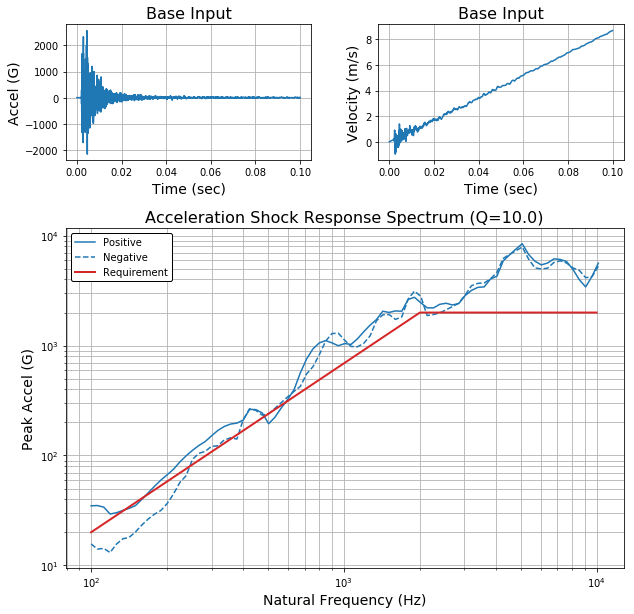

In [3]:
input_data = "./data/1.txt"

# Read data file, time (s) first column, accel (G) second column
# NO COLUMN HEADERS!!!
# A ShockResponseSpectrum object is created

srs_test_object = srs.read_tsv(input_data)

# Build array of natural frequencies for SRS
# similar to np.logspace, but using octaves as the step size

fn_test_array = srs.build_nat_freq_array(fn_start = 100., fn_end = 10000., oct_step_size = (1./12.))

srs_test_object.run_srs_analysis(fn_test_array)

# Plot results. SRS Requirements from test protocol can be added to plot
protocol_fn = np.array([100.,2000.,10e3])
protocol_accel = np.array([20.,2000.,2000.])
test_reqs = (protocol_fn, protocol_accel)

srs_test_object.plot_results(requirement = test_reqs)

Input data has been modified to remove sensor bias (offset)...


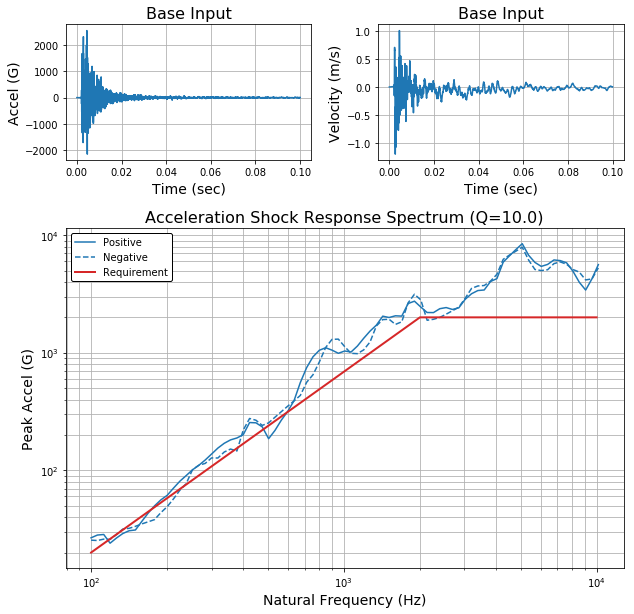

In [4]:
# If sensor bias is detected, (see linearly increasing velocity plot above)
# then remove_bias keyword attempts to center accelerometer data on zero G.
# Be VERY careful, this adjustment may not be appropriate for your data
srs_test_object.run_srs_analysis(fn_test_array, remove_bias= True)

# After removing the bias, the velocity plot appears stable and the
# Positive and Negative Peak Accel have better agreement at lower frequencies
# Adding a filename allows you to save the figure
srs_test_object.plot_results(requirement = test_reqs, filename = 'test_output.svg')

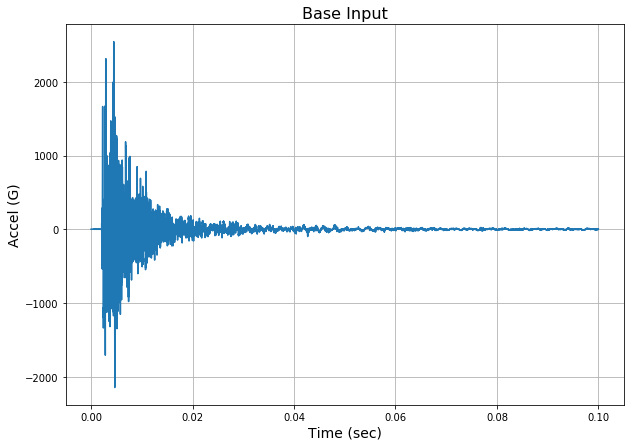

In [5]:
srs_test_object.plot_input_accel()

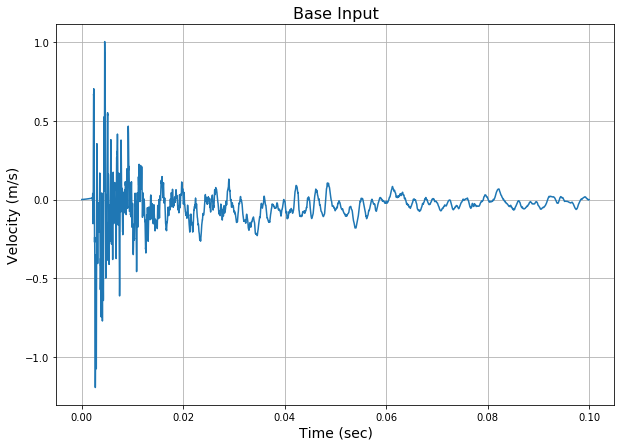

In [6]:
srs_test_object.plot_input_vel()

In [7]:
# Ability to output results to csv
srs_test_object.export_srs_to_csv(filename = 'test_output.csv')